In [14]:
from common.tokenize import tokenize, fix_macros, CouldNotFindError
from common.clean import replace
from common.heuristics import test_for_suitable, split_high_level_eqs, split_exprs, filter_tokens
from common.tokenize import tokenize
from common.katex import katex, load_display_scripts

load_display_scripts()

In [11]:
import json
macro_sources = ['data/all_symbols.json', 'data/inside_set_indicators.json',
                 'data/operator_list.json',
                'data/punctuation_list.json', 'data/close_list.json',
                'data/open_list.json', 'data/spacing_list.json',
                'data/relations_list.json', 'data/functions.json', 
                 'data/macros.json', 'data/symbols.json']
all_macros = {}
for s in macro_sources:
    f = open(s)
    symbls = json.load(f)
    for s in symbls:
        all_macros[s.strip()] = 1
#     with open('all_latex_symbols.txt', 'r', encoding = 'utf-8') as f:
#         for l in json.load(f):
#             print( l)
#             all_macros[l.strip()] = 1

In [16]:
filter_tokens(tokenize('\\frac{x} {y} \\begin{eq }x = \\textfadfsad{tets} \\int 1.0 .6 \\end{test}'))

['\\frac', '{', 'x', '}', '{', 'y', '}', 'x', '=', '\\int', '1.0', '.6']

In [17]:
fix_macros('\int x \gammaxy ', all_macros)
fix_macros('\\frac{\\delta c_s}{c_s} = \\frac{c_{s,\\, {\\rm mag}} - c_{s,\\, 0}}{c_{s,\\, 0}},', all_macros, debug=True)
# fix_macros('\nabla M\'', all_macros)

fix_macros(replace('\\zetat xy'), all_macros)
# fix_macros(r'K_T = \frac{(1-\gamma) \log(Tt^2)}{K(\theta_a^*-t,\theta_a^*+\zetat)} = \frac{(1-\gamma) \log(Tt^2)}{K(\overline{\theta}_a,\theta_a^*+\zetat)},', all_macros)

finding: \frac
found: \frac
finding: \delta
found: \delta
finding: \frac
found: \frac
finding: \rm
found: \rm


'\\zeta t  xy'

In [20]:
err = 0
found = 0
errors = []
all_result = []
with open('eqs_100k.tsv', 'rb') as reader:
    for i, row in enumerate(reader):
        # The equations were saved in the json-encoded format, which double the number of \\ 
        # escapes that we want.
        row = row.decode("unicode_escape")
        row = replace(row)
        row = row.split('\t', 1)[1]
        rowcp = row
#         print(row)
        try:
            row = fix_macros(row, all_macros)
        except CouldNotFindError as couldnotfinderr:
            err += 1
            errors.append((row, couldnotfinderr))
            continue
#             print(row)
#             print(couldnotfinderr)
#         print(row)
        tokenized = tokenize(row)

        ses = split_exprs(tokenized)
        if ses:
            
            for expr in ses:
                se = split_high_level_eqs(expr)

                suit = test_for_suitable(se)
                if suit:
                    all_result.append(se)
                    found += 1
                    if found > 32:
                        print("\nnew\n")
                        print(rowcp)
                        print(row)
                        katex(row)._ipython_display_()
                        fixed2 = fix_macros(replace(rowcp), all_macros, debug=True)
                        print("fixed2")
                        print(fixed2)
                    if found > 40:
                        raise GetOutOfLoop
                    for s in suit:
                        if found > 32:
                            print(s)
                            katex(" ".join(s))._ipython_display_()       


new

 \frac{\partial f_t}{\partial t}(x)=V'(x)f'_t(x)-\frac{\beta}{4} \int \frac{f'_t(x)-f'_t(y)}{x-y} (X_t^N(dy)+X_t(dy))   

 \frac{\partial f_t}{\partial t}(x)=V'(x)f'_t(x)-\frac{\beta}{4} \int \frac {f'_t(x)-f'_t(y)}{x-y} (X_t^N(dy)+X_t(dy))   



finding: \frac
found: \frac
finding: \partial
found: \partial
finding: \partial
found: \partial
finding: \frac
found: \frac
finding: \beta
found: \beta
finding: \int
found: \int
finding: \frac
found: \frac
fixed2
 \frac{\partial f_t}{\partial t}(x)=V'(x)f'_t(x)-\frac{\beta}{4} \int \frac {f'_t(x)-f'_t(y)}{x-y} (X_t^N(dy)+X_t(dy))   

['\\frac', '{', '\\partial', 'f', '_', 't', '}', '{', '\\partial', 't', '}', '(', 'x', ')']


['V', "'", '(', 'x', ')', 'f', "'", '_', 't', '(', 'x', ')', '-', '\\frac', '{', '\\beta', '}', '{', '4', '}', '\\int', '\\frac', '{', 'f', "'", '_', 't', '(', 'x', ')', '-', 'f', "'", '_', 't', '(', 'y', ')', '}', '{', 'x', '-', 'y', '}', '(', 'X', '_', 't', '^', 'N', '(', 'd', 'y', ')', '+', 'X', '_', 't', '(', 'd', 'y', ')', ')']



new

 
\int_0^{\infty}\frac{r^{2n-3}dr}{(1+r^2)^{2n-1}}  =  \frac{1}{2}\int_0^{\infty}\frac{r^{n-2}dr}{(1+r)^{2n-1}}  =  \frac{1}{2n-2} {2n-2 \choose n-1}^{-1}


 
\int_0^{\infty}\frac{r^{2n-3}dr}{(1+r^2)^{2n-1}}  =  \frac{1}{2}\int_0^{\infty}\frac{r^{n-2}dr}{(1+r)^{2n-1}}  =  \frac{1}{2n-2} {2n-2 \choose  n-1}^{-1}




finding: \int
found: \int
finding: \infty
found: \infty
finding: \frac
found: \frac
finding: \frac
found: \frac
finding: \int
found: \int
finding: \infty
found: \infty
finding: \frac
found: \frac
finding: \frac
found: \frac
finding: \choose
found: \choose
fixed2
 
\int_0^{\infty}\frac{r^{2n-3}dr}{(1+r^2)^{2n-1}}  =  \frac{1}{2}\int_0^{\infty}\frac{r^{n-2}dr}{(1+r)^{2n-1}}  =  \frac{1}{2n-2} {2n-2 \choose  n-1}^{-1}


['\\int', '_', '0', '^', '{', '\\infty', '}', '\\frac', '{', 'r', '^', '{', '2', 'n', '-', '3', '}', 'd', 'r', '}', '{', '(', '1', '+', 'r', '^', '2', ')', '^', '{', '2', 'n', '-', '1', '}', '}']


['\\frac', '{', '1', '}', '{', '2', '}', '\\int', '_', '0', '^', '{', '\\infty', '}', '\\frac', '{', 'r', '^', '{', 'n', '-', '2', '}', 'd', 'r', '}', '{', '(', '1', '+', 'r', ')', '^', '{', '2', 'n', '-', '1', '}', '}']


['\\frac', '{', '1', '}', '{', '2', 'n', '-', '2', '}', '{', '2', 'n', '-', '2', '\\choose', 'n', '-', '1', '}', '^', '{', '-', '1', '}']



new


\frac {\partial L}{\partial {\vartheta}} = - \frac {\partial^2 E}{\partial w \partial {\vartheta}}
\left( \frac {\partial^2 E}{\partial {w}^2}\right)^{-1}
\frac {\partial L}{\partial w} \bigg|_{w = w^*}



\frac {\partial L}{\partial {\vartheta}} = - \frac {\partial^2 E}{\partial w \partial {\vartheta}}
\left( \frac {\partial^2 E}{\partial {w}^2}\right)^{-1}
\frac {\partial L}{\partial w} \bigg |_{w = w^*}




finding: \frac
found: \frac
finding: \partial
found: \partial
finding: \partial
found: \partial
finding: \vartheta
found: \vartheta
finding: \frac
found: \frac
finding: \partial
found: \partial
finding: \partial
found: \partial
finding: \partial
found: \partial
finding: \vartheta
found: \vartheta
finding: \left
found: \left
finding: \frac
found: \frac
finding: \partial
found: \partial
finding: \partial
found: \partial
finding: \right
found: \right
finding: \frac
found: \frac
finding: \partial
found: \partial
finding: \partial
found: \partial
finding: \bigg
found: \bigg
fixed2

\frac {\partial L}{\partial {\vartheta}} = - \frac {\partial^2 E}{\partial w \partial {\vartheta}}
\left( \frac {\partial^2 E}{\partial {w}^2}\right)^{-1}
\frac {\partial L}{\partial w} \bigg |_{w = w^*}


['\\frac', '{', '\\partial', 'L', '}', '{', '\\partial', '{', '\\vartheta', '}', '}']


['-', '\\frac', '{', '\\partial', '^', '2', 'E', '}', '{', '\\partial', 'w', '\\partial', '{', '\\vartheta', '}', '}', '\\left', '(', '\\frac', '{', '\\partial', '^', '2', 'E', '}', '{', '\\partial', '{', 'w', '}', '^', '2', '}', '\\right', ')', '^', '{', '-', '1', '}', '\\frac', '{', '\\partial', 'L', '}', '{', '\\partial', 'w', '}', '\\bigg', '|', '_', '{', 'w', '=', 'w', '^', '*', '}']



new

\mathcal{V}:=\bigcap_{i\in\Lambda}\mathcal{W}_i\mbox{and}\mathcal{V}':=\bigcap_{i\in\Lambda}\mathcal{W}_i'

\mathcal{V}:=\bigcap_{i\in\Lambda}\mathcal{W}_i\mbox{and}\mathcal{V}':=\bigcap_{i\in\Lambda}\mathcal {W}_i'



finding: \mathcal
found: \mathcal
finding: \bigcap
found: \bigcap
finding: \in
found: \in
finding: \Lambda
found: \Lambda
finding: \mathcal
found: \mathcal
finding: \mbox
found: \mbox
finding: \mathcal
found: \mathcal
finding: \bigcap
found: \bigcap
finding: \in
found: \in
finding: \Lambda
found: \Lambda
finding: \mathcal
found: \mathcal
fixed2
\mathcal{V}:=\bigcap_{i\in\Lambda}\mathcal{W}_i\mbox{and}\mathcal{V}':=\bigcap_{i\in\Lambda}\mathcal {W}_i'

['\\bigcap', '_', '{', 'i', '\\in', '\\Lambda', '}', '\\mathcal', '{', 'W', '}', '_', 'i', '\\mbox', '{', 'a', 'n', 'd', '}', '\\mathcal', '{', 'V', '}', "'", ':']


['\\bigcap', '_', '{', 'i', '\\in', '\\Lambda', '}', '\\mathcal', '{', 'W', '}', '_', 'i', "'"]



new

\big({\mathbf{z}}[{\vec{\mathrmx}}]\big)_\kappa=\frac{\delta}{x_{{\kappa+\frac12}}-x_{{\kappa-\frac12}}}=\frac1{[{\operatorname{D}_\delta}^1{\vec{\mathrmx}}]_\kappa}\text{for}\kappa=\frac12,\frac32,\ldots,K-\frac12,

\big({\mathbf{z}}[{\vec{\mathrm x}}]\big)_\kappa=\frac{\delta}{x_{{\kappa+\frac12}}-x_{{\kappa-\frac12}}}=\frac1{[{\operatorname{D}_\delta}^1{\vec{\mathrm x}}]_\kappa}\text{for}\kappa=\frac12,\frac32,\ldots,K-\frac 12,



finding: \big
found: \big
finding: \mathbf
found: \mathbf
finding: \vec
found: \vec
finding: \mathrmx
found: \mathrm x
finding: \big
found: \big
finding: \kappa
found: \kappa
finding: \frac
found: \frac
finding: \delta
found: \delta
finding: \kappa
found: \kappa
finding: \frac
found: \frac
finding: \kappa
found: \kappa
finding: \frac
found: \frac
finding: \frac
found: \frac
finding: \operatorname
found: \operatorname
finding: \delta
found: \delta
finding: \vec
found: \vec
finding: \mathrmx
found: \mathrm x
finding: \kappa
found: \kappa
finding: \text
found: \text
finding: \kappa
found: \kappa
finding: \frac
found: \frac
finding: \frac
found: \frac
finding: \ldots
found: \ldots
finding: \frac
found: \frac
fixed2
\big({\mathbf{z}}[{\vec{\mathrm x}}]\big)_\kappa=\frac{\delta}{x_{{\kappa+\frac12}}-x_{{\kappa-\frac12}}}=\frac1{[{\operatorname{D}_\delta}^1{\vec{\mathrm x}}]_\kappa}\text{for}\kappa=\frac12,\frac32,\ldots,K-\frac 12,

['\\frac', '{', '\\delta', '}', '{', 'x', '_', '{', '{', '\

['\\frac', '1', '{', '[', '{', '\\operatorname', '{', 'D', '}', '_', '\\delta', '}', '^', '1', '{', '\\vec', '{', '\\mathrm', 'x', '}', '}', ']', '_', '\\kappa', '}', '\\text', '{', 'f', 'o', 'r', '}', '\\kappa']


['\\frac', '12']



new

\int_{-\infty}^\infty\text{d}x\,\text{e}^{-x^2}=\;h+2h\sum_{m=1}^{M}\text{e}^{-(mh)^2}

\int_{-\infty}^\infty\text{d}x{d}x\,\text{e}^{-x^2}={e}^{-x^2}=\;h+2h\sum_{m=1}^{M}\text {e}^{-(mh)^2}



finding: \int
found: \int
finding: \infty
found: \infty
finding: \infty
found: \infty
finding: \text
found: \text
finding: \text
found: \text
finding: \sum
found: \sum
finding: \text
found: \text
fixed2
\int_{-\infty}^\infty\text{d}x{d}x\,\text{e}^{-x^2}={e}^{-x^2}=\;h+2h\sum_{m=1}^{M}\text {e}^{-(mh)^2}

['\\int', '_', '{', '-', '\\infty', '}', '^', '\\infty', '\\text', '{', 'd', '}', 'x', '{', 'd', '}', 'x', '\\,', '\\text', '{', 'e', '}', '^', '{', '-', 'x', '^', '2', '}']


['\\;', 'h', '+', '2', 'h', '\\sum', '_', '{', 'm', '=', '1', '}', '^', '{', 'M', '}', '\\text', '{', 'e', '}', '^', '{', '-', '(', 'm', 'h', ')', '^', '2', '}']



new


\frac{1}{ab}=\int^1_0 \frac{dz}{[az+b(1-z)]^2},



\frac{1}{ab}=\int^1_0 \frac {dz}{[az+b(1-z)]^2},




finding: \frac
found: \frac
finding: \int
found: \int
finding: \frac
found: \frac
fixed2

\frac{1}{ab}=\int^1_0 \frac {dz}{[az+b(1-z)]^2},


['\\frac', '{', '1', '}', '{', 'a', 'b', '}']


['\\int', '^', '1', '_', '0', '\\frac', '{', 'd', 'z', '}', '{', '[', 'a', 'z', '+', 'b', '(', '1', '-', 'z', ')', ']', '^', '2', '}']



new

b_1(u) = \frac{1 - u q^{1/2} }{1 - u q^{-1/2}} \mbox{ and }b_2(u) = \frac{ -uq^{-1/2}+ q^{-1}}{ 1 - uq^{-1/2}}.

b_1(u) = \frac{1 - u q^{1/2} }{1 - u q^{-1/2}} \mbox{ and }b_2(u) = \frac { -uq^{-1/2}+ q^{-1}}{ 1 - uq^{-1/2}}.



finding: \frac
found: \frac
finding: \mbox
found: \mbox
finding: \frac
found: \frac
fixed2
b_1(u) = \frac{1 - u q^{1/2} }{1 - u q^{-1/2}} \mbox{ and }b_2(u) = \frac { -uq^{-1/2}+ q^{-1}}{ 1 - uq^{-1/2}}.

['\\frac', '{', '1', '-', 'u', 'q', '^', '{', '1', '/', '2', '}', '}', '{', '1', '-', 'u', 'q', '^', '{', '-', '1', '/', '2', '}', '}', '\\mbox', '{', 'a', 'n', 'd', '}', 'b', '_', '2', '(', 'u', ')']


['\\frac', '{', '-', 'u', 'q', '^', '{', '-', '1', '/', '2', '}', '+', 'q', '^', '{', '-', '1', '}', '}', '{', '1', '-', 'u', 'q', '^', '{', '-', '1', '/', '2', '}', '}', '.']



new

 p_c=\dfrac{4(\alpha+1)}{(2\alpha+3)}
\text{and its conjugate  }p_c'=\dfrac{4(\alpha+1)}{(2\alpha+1)}.


 p_c=\dfrac{4(\alpha+1)}{(2\alpha+3)}
\text{and its conjugate  }p_c'=\dfrac{4(\alpha+1)}{(2\alpha +1)}.




finding: \dfrac
found: \dfrac
finding: \alpha
found: \alpha
finding: \alpha
found: \alpha
finding: \text
found: \text
finding: \dfrac
found: \dfrac
finding: \alpha
found: \alpha
finding: \alpha
found: \alpha
fixed2
 p_c=\dfrac{4(\alpha+1)}{(2\alpha+3)}
\text{and its conjugate  }p_c'=\dfrac{4(\alpha+1)}{(2\alpha +1)}.




NameError: name 'GetOutOfLoop' is not defined

In [10]:
print(err)
print(found)
from collections import Counter
c = Counter([e[1].parameter[1] for e in errors])

641
2822


In [11]:
c.most_common()

[('\\noalign', 57),
 ('\\node', 50),
 ('\\wd', 46),
 ('\\g', 41),
 ('\\n', 29),
 ('\\y', 23),
 ('\\global', 22),
 ('\\q', 18),
 ('\\V', 17),
 ('\\w', 16),
 ('\\z', 15),
 ('\\noindent', 12),
 ('\\goth', 11),
 ('\\wt', 10),
 ('\\ga', 9),
 ('\\W', 8),
 ('\\nobreak', 7),
 ('\\young', 6),
 ('\\nn', 6),
 ('\\goodbreak', 5),
 ('\\non', 5),
 ('\\nopagebreak', 5),
 ('\\gathered', 4),
 ('\\yng', 4),
 ('\\qbezier', 4),
 ('\\ns', 3),
 ('\\nt', 3),
 ('\\na', 3),
 ('\\gam', 3),
 ('\\grad', 3),
 ('\\ncline', 3),
 ('\\wh', 3),
 ('\\gradf', 3),
 ('\\zero', 3),
 ('\\gf', 3),
 ('\\gradcomm', 2),
 ('\\zref', 2),
 ('\\quantno', 2),
 ('\\WF', 2),
 ('\\qopname', 2),
 ('\\nw', 2),
 ('\\wb', 2),
 ('\\zs', 2),
 ('\\qq', 2),
 ('\\Ã', 2),
 ('\\gl', 2),
 ('\\qty', 2),
 ('\\wtd', 2),
 ('\\nm', 2),
 ('\\zap', 2),
 ('\\nor', 2),
 ('\\wcircle', 2),
 ('\\gb', 2),
 ('\\gh', 2),
 ('\\nsp', 2),
 ('\\gothf', 2),
 ('\\nodeat', 2),
 ('\\nf', 1),
 ('\\gr', 1),
 ('\\gothic', 1),
 ('\\nodata', 1),
 ('\\yp', 1),
 ('\\qua', 1),
 

In [12]:
all_result[0]

[['3',
  '\\widetilde',
  '{',
  '\\Gamma',
  '}',
  '_',
  '{',
  '2',
  'j',
  '}',
  '-',
  '3',
  '\\Gamma',
  '_',
  '{',
  '2',
  'j',
  '}'],
 ['-',
  '3',
  'R',
  '_',
  '4',
  '(',
  '0',
  ')',
  'a',
  '_',
  '{',
  '2',
  'j',
  '}',
  '^',
  '2',
  '-',
  '6',
  '\\int',
  '_',
  '{',
  '\\gamma',
  '_',
  'j',
  '}',
  '\\frac',
  '{',
  'S',
  '_',
  '2',
  'R',
  '_',
  '4',
  '}',
  '{',
  'r',
  '^',
  '5',
  '}',
  '{',
  'S',
  '_',
  '2',
  'R',
  '_',
  '4',
  '}',
  '{',
  'r',
  '^',
  '5',
  '}',
  '\\,',
  '\\psi',
  '_',
  '2',
  '\\varphi',
  '_',
  '1',
  '^',
  '4',
  '_',
  '1',
  '^',
  '4',
  '\\,',
  'd',
  'w',
  '+',
  '3',
  '\\int',
  '_',
  '{',
  '\\gamma',
  '_',
  'j',
  '}',
  '\\frac',
  '{',
  'S',
  '_',
  '2',
  'R',
  '_',
  '3',
  '}',
  '{',
  'r',
  '^',
  '4',
  '}',
  '{',
  'S',
  '_',
  '2',
  'R',
  '_',
  '3',
  '}',
  '{',
  'r',
  '^',
  '4',
  '}',
  '\\,',
  '\\psi',
  '_',
  '2',
  '^',
  '2',
  '\\varphi',
  '_',
  '1',
  

In [13]:
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim.similarities import MatrixSimilarity

In [14]:
docs = [doc for sublist in all_result for doc in sublist]
dct = Dictionary(docs)
corpus = [dct.doc2bow(line) for line in docs]
model = TfidfModel(corpus)

In [15]:
index = MatrixSimilarity(model[corpus], num_features=len(dct))

In [16]:
# line = all_result[0]
# sims = index[model[dct.doc2bow(line)]]
# sims = sorted(enumerate(sims), key=lambda item: -item[1])

TypeError: decoding to str: need a bytes-like object, list found

In [17]:
eqs = all_result
from gensim import interfaces, utils, matutils
import numpy as np
num_features = len(dct)
all_dists = []
for aligned_eqs in eqs:
    vecs = []
    for e in aligned_eqs: 
        sparse_vec = model[dct.doc2bow(e)]
        query = matutils.sparse2full(sparse_vec, num_features)
        query = np.asarray(query, dtype=np.float32)
        vecs.append(query)
    
    dists = []
    for i, v in enumerate(vecs):
        for j, v2 in enumerate(vecs):
            if i != j:
#                 print("aligned:")
#                 print(aligned_eqs[i])
#                 print(aligned_eqs[j])
                dists.append(v.dot(v2))
    all_dists.extend(list(set(dists)))



In [18]:
# now do a random pass
N = len(eqs)
num_features = len(dct)
rand_dists = []
for aligned_eqs in eqs:
    vecs = []
    for e in aligned_eqs: 
        sparse_vec = model[dct.doc2bow(e)]
        query = matutils.sparse2full(sparse_vec, num_features)
        query = np.asarray(query, dtype=np.float32)
        vecs.append(query)
    
    dists = []
    for i, v in enumerate(vecs):
        # pick a random vector
        rand_i = np.random.randint(N)
        # Note: had to pull in a long range dependency on the docs list here. Could cause problems later.
        sparse_vec = model[dct.doc2bow(docs[rand_i])]
        rand_vec = matutils.sparse2full(sparse_vec, num_features)
        rand_vec = np.asarray(rand_vec, dtype=np.float32)
        dists.append(v.dot(rand_vec))
    rand_dists.extend(list(set(dists)))


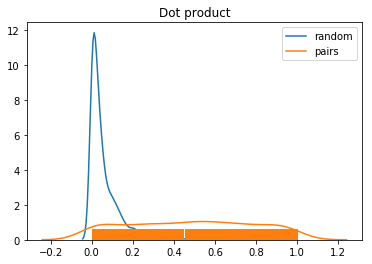

In [24]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
# test = pd.DataFrame([rand_dists, all_dists])
# plt.hist(test.values.T)
# plt.show()
sns.distplot(rand_dists[0:1000], hist=False, rug=True, label="random")
sns.distplot(all_dists[0:1000], hist=False, rug=True, label="pairs").set_title('Dot product')
plt.savefig('dists.png')

In [27]:
all_dists[0]

0.26734915

In [24]:
import pickle
pickle.load(open('raw_tr_embed_proj.pkl', 'rb'))

# sns.distplot(rand_dists[0:1000], hist=False, rug=True)
# sns.distplot(all_dists[0:1000], hist=False, rug=True)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe9 in position 2: ordinal not in range(128)

In [ ]:
[["\\frac", "{", "1", "}", "{", "T", "}", "\\cdot", "\\sum", "_", "{", "t", "=", "0", "}", "^", "{", "T", "-", "1", "}", "z", "_", "j", "(", "p", "^", "t", ")"], ["\\frac", "{", "1", "}", "{", "T", "}", "\\cdot", "\\sum", "_", "{", "t", "=", "0", "}", "^", "{", "T", "_", "0", "}", "z", "_", "j", "(", "p", "^", "t", ")"],
 ["\\frac", "1", "8", "\\cdot", "2", "{", "\\varepsilon", "}", "w", "^", "2"]]